In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

In [7]:
df_yen_euro = pd.read_csv('data_yen.csv', skiprows=4)
df_yen_euro.dropna(inplace=True)
df_yen_euro

,Period\Unit:,[Japanese yen ]
0,2023-09-01,157.47
1,2023-08-31,158.49
2,2023-08-30,159.15
3,2023-08-29,158.93
4,2023-08-28,158.35
...,...,...
6376,1999-01-08,130.09
6377,1999-01-07,129.43
6378,1999-01-06,131.42
6379,1999-01-05,130.96


In [8]:
df_yen_euro.rename(columns={'Period\\Unit:': 'date', '[Japanese yen ]': 'JPY'}, inplace=True)
df_yen_euro

,date,JPY
0,2023-09-01,157.47
1,2023-08-31,158.49
2,2023-08-30,159.15
3,2023-08-29,158.93
4,2023-08-28,158.35
...,...,...
6376,1999-01-08,130.09
6377,1999-01-07,129.43
6378,1999-01-06,131.42
6379,1999-01-05,130.96


In [9]:
df_yen_euro.dtypes

date    object
JPY     object
dtype: object

In [ ]:
#casting 'date' column to datetime and 'JPY' columns to float

In [11]:
date = pd.to_datetime(df_yen_euro['date'])
df_yen_euro['date'] = date


In [13]:
df_yen_euro['JPY'] = pd.to_numeric(df_yen_euro['JPY'], errors='coerce')


In [14]:
df_yen_euro.dtypes

date    datetime64[ns]
JPY            float64
dtype: object

In [15]:
#filter it to show only data from 2018 onwards
df_yen_euro['date'] = pd.to_datetime(df_yen_euro['date'])
df_yen_euro = df_yen_euro[df_yen_euro['date'] >= '2018-01-01']
df_yen_euro

,date,JPY
0,2023-09-01,157.47
1,2023-08-31,158.49
2,2023-08-30,159.15
3,2023-08-29,158.93
4,2023-08-28,158.35
...,...,...
1449,2018-01-08,135.34
1450,2018-01-05,136.45
1451,2018-01-04,135.92
1452,2018-01-03,134.97


Calculating the highest and the lowest depriciation against euro (the highest and the lowest historical value in the dataset)

<Axes: xlabel='date'>

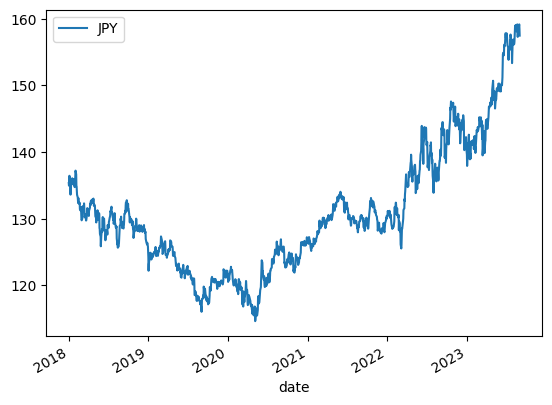

In [16]:
df_yen_euro.plot(x='date', y=['JPY'])

Max val of 159.150 at date 2
Min val of 114.650 at date 857


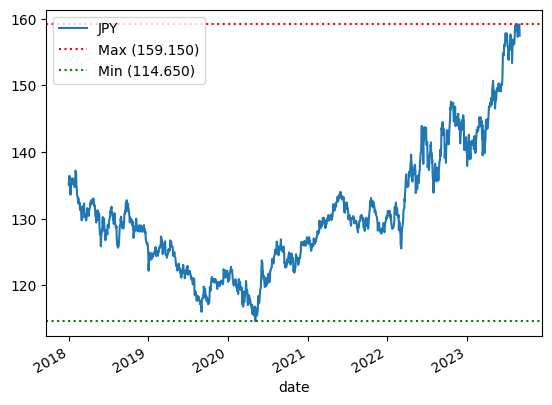

In [17]:
# Plot the DataFrame
ax = df_yen_euro.plot(x='date', y=['JPY'])

# Calculate maximum and minimum values and their indices
max_val = df_yen_euro['JPY'].max()
max_idx = df_yen_euro['JPY'].idxmax()
min_val = df_yen_euro['JPY'].min()
min_idx = df_yen_euro['JPY'].idxmin()

# Print the results
print(f"Max val of {max_val:.3f} at date {max_idx}")
print(f"Min val of {min_val:.3f} at date {min_idx}")

# Add dotted lines for maximum and minimum values
ax.axhline(max_val, color='red', linestyle='dotted', label=f'Max ({max_val:.3f})')
ax.axhline(min_val, color='green', linestyle='dotted', label=f'Min ({min_val:.3f})')

# Show the legend
ax.legend()

# Show the plot
plt.show()

- See the difference between 2 days in order to determine the highest appreciation and depreciation against Euro in one day
- first create a copy of the dataframe, otherwise i will get warnings that pandas is attempting to modify a copy of the DataFrame rather than the original DataFrame

In [19]:
df_yen_euro_2 = df_yen_euro.copy()

<Axes: >

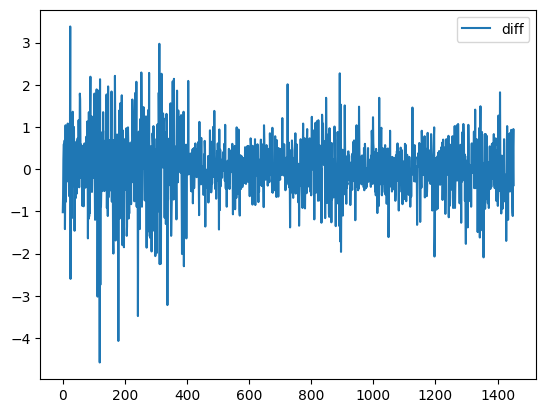

In [22]:
df_yen_euro_2['diff'] = df_yen_euro_2['JPY'].diff(-1)
df_yen_euro_2.plot(y=['diff'])

<Axes: >

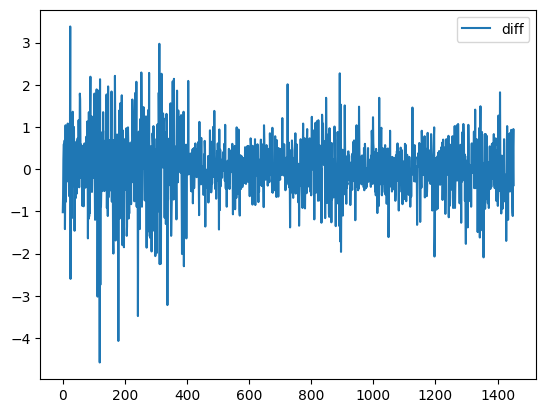

In [23]:
df_yen_euro_2['diff'] = df_yen_euro_2['JPY'].diff(-1)
df_yen_euro_2.plot(y=['diff'])

<Axes: xlabel='date'>

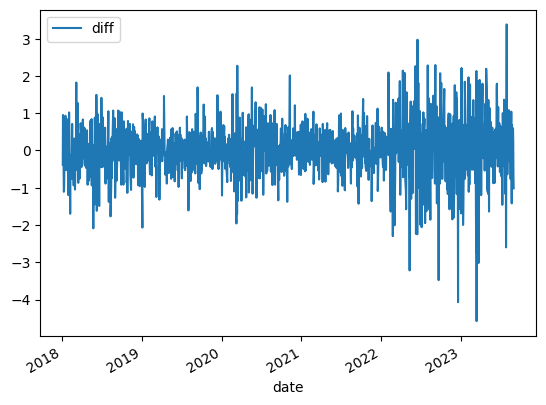

In [24]:
df_yen_euro_2.plot(x= 'date', y = ['diff'])

In [25]:
max_date = df_yen_euro_2['date'][df_yen_euro_2['diff'].idxmax()]
min_date = df_yen_euro_2['date'][df_yen_euro_2['diff'].idxmin()]

print("Date for Max Value:", max_date)
print("Date for Min Value:", min_date)

Date for Max Value: 2023-07-31 00:00:00
Date for Min Value: 2023-03-15 00:00:00


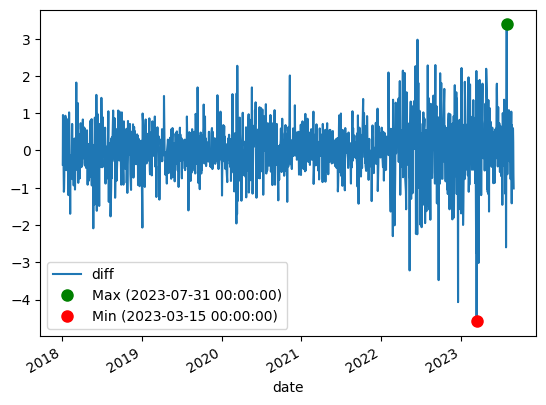

In [26]:
max_date = df_yen_euro_2['date'][df_yen_euro_2['diff'].idxmax()]
min_date = df_yen_euro_2['date'][df_yen_euro_2['diff'].idxmin()]

# Create the plot
ax = df_yen_euro_2.plot(x='date', y=['diff'], legend=False)

# Add markers for the max and min values
ax.plot(max_date, df_yen_euro_2['diff'].max(), marker='o', markersize=8, label=f'Max ({max_date})', linestyle='', color='green')
ax.plot(min_date, df_yen_euro_2['diff'].min(), marker='o', markersize=8, label=f'Min ({min_date})', linestyle='', color='red')

# Add legend
plt.legend()

# Show the plot
plt.show()